<a href="https://colab.research.google.com/github/Laviniamadeira/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,                            f1_score, confusion_matrix, classification_report)
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

#Preparação de dados


In [224]:
dados = pd.read_csv(f'/content/dados_limpos.csv', engine = 'python')

In [225]:
dados.head()

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


In [226]:
#Remocão de colunas irrelevantes
dados = dados.drop(columns=['id_cliente'])
dados.head()

,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0,0,0,1,1,9,1,0,DSL,No,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0,1,0,0,0,9,1,1,DSL,No,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,1,1,0,0,0,4,1,0,Fiber optic,No,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,1,1,1,1,0,13,1,0,Fiber optic,No,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,1,0,1,1,0,3,1,0,Fiber optic,No,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


In [227]:
# Primeiramente, identificamos as colunas categóricas
categorical_cols = [ 'servico_internet',
    'seguranca_online', 'tipo_contrato',
    'metodo_pagamento'
]

# Aplicando one-hot encoding
dados_encoded = pd.get_dummies(dados, columns=categorical_cols, drop_first=True)


In [228]:
bool_cols = dados_encoded.select_dtypes(include='bool').columns  # seleciona colunas booleanas

# converter True/False em 0/1
dados_encoded[bool_cols] = dados_encoded[bool_cols].astype(int)

# Visualiza o resultado
dados_encoded.head()

,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,backup_online,protecao_dispositivo,...,contas_diarias,servico_internet_Fiber optic,servico_internet_No,seguranca_online_No internet service,seguranca_online_Yes,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,0,0,1,1,9,1,0,1,0,...,2.186667,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,9,1,1,0,0,...,1.996667,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,1,...,2.463333,1,0,0,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,1,1,...,3.266667,1,0,0,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,2.796667,1,0,0,0,0,0,0,0,1


In [229]:
# Total de clientes
total_clientes = len(dados_encoded)

# Total de cancelamentos
total_cancelamentos = dados_encoded['cancelamento'].sum()

# Proporção de evasão
proporcao_evasao = total_cancelamentos / total_clientes

print(f"Total de clientes: {total_clientes}")
print(f"Total de cancelamentos: {total_cancelamentos}")
print(f"Proporção de evasão: {proporcao_evasao:.2%}")

Total de clientes: 7267
Total de cancelamentos: 1869
Proporção de evasão: 25.72%


#🎯 Correlação e Seleção de Variáveis:

In [230]:
# Calcula a correlação entre todas as colunas numéricas
correlation_matrix = dados_encoded.corr()

# Exibe a correlação com a coluna 'cancelamento' em ordem decrescente
correlation_with_target = correlation_matrix['cancelamento'].sort_values(ascending=False)
print(correlation_with_target)

cancelamento                                1.000000
servico_internet_Fiber optic                0.300949
metodo_pagamento_Electronic check           0.294626
contas_diarias                              0.189866
custo_mensal                                0.189866
fatura_online                               0.186666
idoso                                       0.146733
tv_streaming                                0.062430
filmes_streaming                            0.060586
multiplas_linhas                            0.039343
servico_telefonico                          0.012571
genero                                     -0.009555
protecao_dispositivo                       -0.063452
backup_online                              -0.080163
metodo_pagamento_Mailed check              -0.090061
metodo_pagamento_Credit card (automatic)   -0.131085
possui_conjuge                             -0.148546
suporte_tecnico                            -0.160440
possui_dependentes                         -0.

In [231]:
# 2.1 Análise de Correlação
print(f"\n🔍 2.1 Análise de correlação com churn...")

# Matriz de correlação
correlation_matrix = correlation_matrix.corr()
churn_correlations = correlation_matrix['cancelamento'].sort_values(key=abs, ascending=False)

print(f"📊 Top 10 variáveis mais correlacionadas com churn:")
print(churn_correlations.head(11).round(4))  # 11 porque inclui churn com ela mesma# Visualização da matriz de correlação


🔍 2.1 Análise de correlação com churn...
📊 Top 10 variáveis mais correlacionadas com churn:
cancelamento                            1.0000
metodo_pagamento_Electronic check       0.6877
tipo_contrato_Two year                 -0.6862
meses_como_cliente                     -0.5887
servico_internet_Fiber optic            0.5792
possui_dependentes                     -0.5144
fatura_online                           0.5131
idoso                                   0.4508
possui_conjuge                         -0.4472
seguranca_online_No internet service   -0.4171
servico_internet_No                    -0.4171
Name: cancelamento, dtype: float64


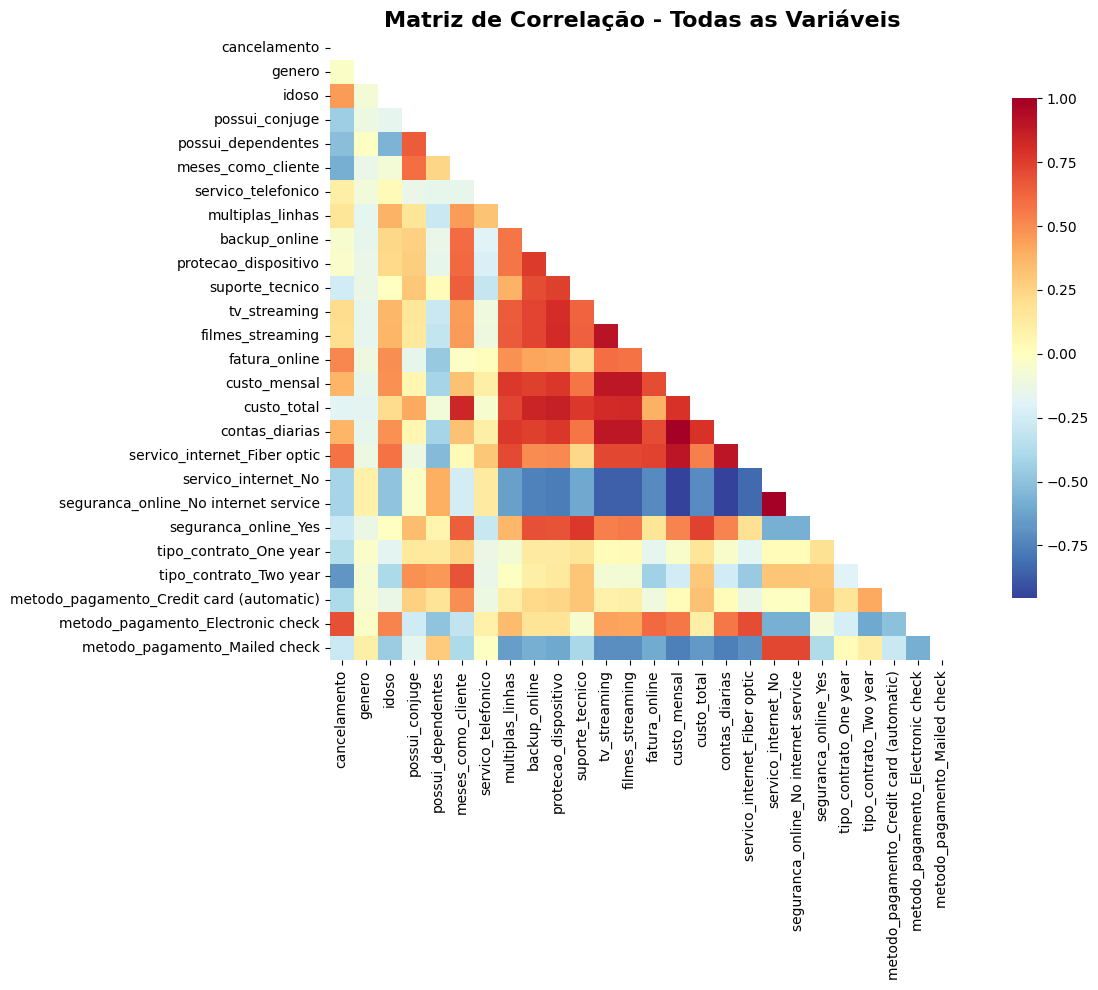

In [232]:
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,  # Removido para melhor visualização
            cmap='RdYlBu_r',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação - Todas as Variáveis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [233]:
# 2.2 Análises Direcionadas
print(f"\n🎯 2.2 Análises direcionadas...")

# Tempo de contrato × Evasão
print(f"📈 Análise: Tempo de contrato (tenure) × Evasão")
tenure_analysis = dados_encoded.groupby('cancelamento')['meses_como_cliente'].describe()
print(tenure_analysis.round(2))

# Total gasto × Evasão
print(f"\n💰 Análise: Total gasto (charges_total) × Evasão")
charges_analysis = dados_encoded.groupby('cancelamento')['custo_total'].describe()
print(charges_analysis.round(2))


🎯 2.2 Análises direcionadas...
📈 Análise: Tempo de contrato (tenure) × Evasão
               count   mean    std  min   25%   50%   75%   max
cancelamento                                                   
0             5398.0  37.32  24.18  0.0  14.0  37.0  61.0  72.0
1             1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0

💰 Análise: Total gasto (charges_total) × Evasão
               count     mean      std   min    25%     50%      75%     max
cancelamento                                                                
0             5398.0  2534.80  2330.80   0.0  564.0  1663.0  4236.75  8672.0
1             1869.0  1531.32  1890.82  18.0  134.0   703.0  2331.00  8684.0


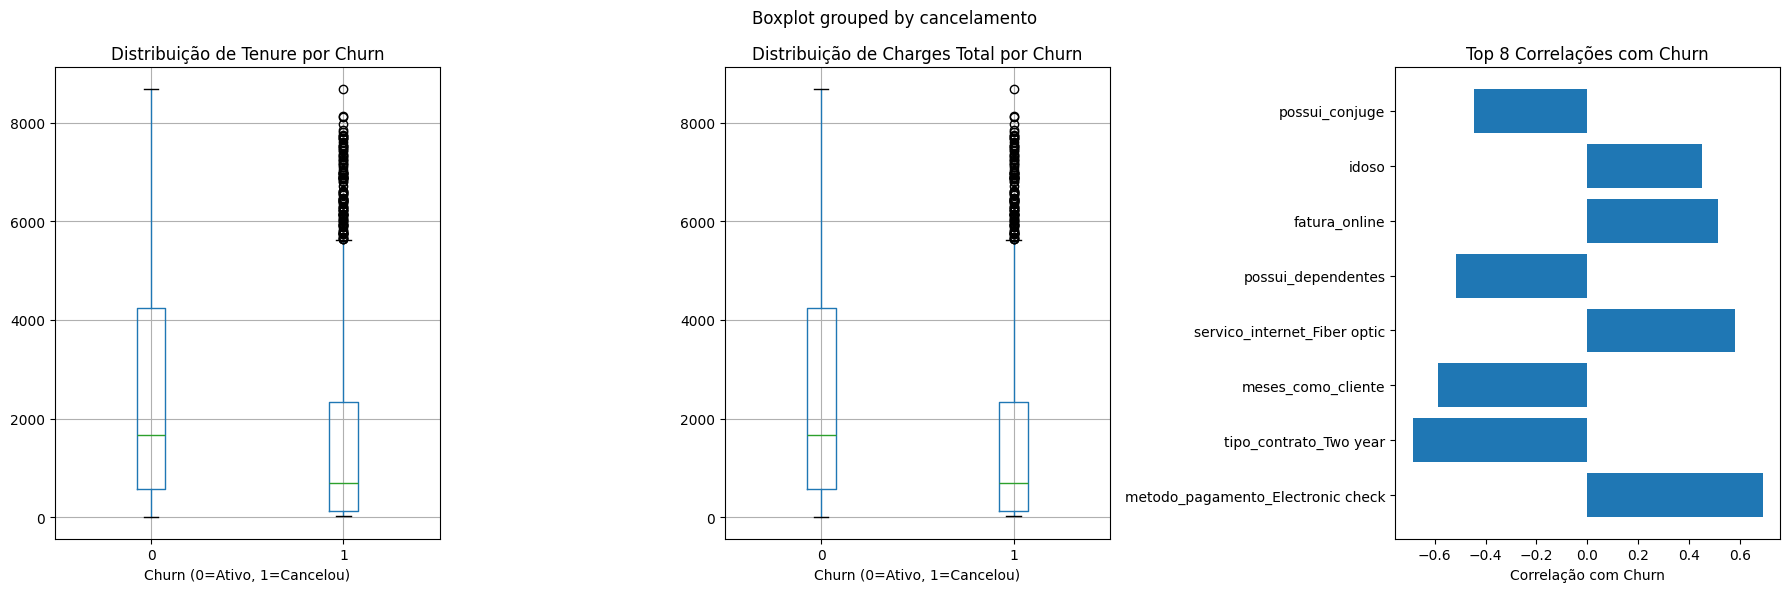

In [234]:
# Visualizações direcionadas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot: Tenure vs Churn
dados_encoded.boxplot(column='custo_total', by='cancelamento', ax=axes[0])
axes[0].set_title('Distribuição de Tenure por Churn')
axes[0].set_xlabel('Churn (0=Ativo, 1=Cancelou)')

# Boxplot: Charges Total vs Churn
dados_encoded.boxplot(column='custo_total', by='cancelamento', ax=axes[1])
axes[1].set_title('Distribuição de Charges Total por Churn')
axes[1].set_xlabel('Churn (0=Ativo, 1=Cancelou)')

# Correlações mais importantes com churn
top_correlations = churn_correlations.drop('cancelamento').head(8)
axes[2].barh(range(len(top_correlations)), top_correlations.values)
axes[2].set_yticks(range(len(top_correlations)))
axes[2].set_yticklabels(top_correlations.index, fontsize=10)
axes[2].set_xlabel('Correlação com Churn')
axes[2].set_title('Top 8 Correlações com Churn')

plt.tight_layout()
plt.show()

#🤖 Modelagem Preditiva

In [235]:
# Separar features e target
X = dados_encoded.drop('cancelamento', axis=1)
y = dados_encoded['cancelamento']

# Divisão treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [236]:
print(f"✅ Divisão realizada:")
print(f"• Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"• Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"• Features: {X_train.shape[1]}")

# Verificar distribuição de classes
print(f"\n📊 Distribuição de churn nos conjuntos:")
print(f"• Treino: {y_train.mean()*100:.2f}% churn")
print(f"• Teste: {y_test.mean()*100:.2f}% churn")

✅ Divisão realizada:
• Treino: 5086 amostras (70.0%)
• Teste: 2181 amostras (30.0%)
• Features: 25

📊 Distribuição de churn nos conjuntos:
• Treino: 25.72% churn
• Teste: 25.72% churn


In [237]:
# Normalizar dados para modelos que precisam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Dados normalizados com StandardScaler")
print(f"📊 Shape dados normalizados: {X_train_scaled.shape}")

# 3.3 Criação de Modelos
print(f"\n🎯 3.3 Treinando modelos...")

# Dicionário para armazenar modelos e resultados
models = {}
results = {}

# MODELO 1: Regressão Logística (EXIGE normalização)
print(f"\n🔵 Modelo 1: Regressão Logística")
print(f"💡 Justificativa: Modelo linear baseado em probabilidades, sensível à escala")
print(f"⚖️ Normalização: NECESSÁRIA")

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
models['Logistic_Regression'] = lr_model

# Predições
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

✅ Dados normalizados com StandardScaler
📊 Shape dados normalizados: (5086, 25)

🎯 3.3 Treinando modelos...

🔵 Modelo 1: Regressão Logística
💡 Justificativa: Modelo linear baseado em probabilidades, sensível à escala
⚖️ Normalização: NECESSÁRIA


In [238]:
# MODELO 2: Random Forest (NÃO exige normalização)
print(f"\n🌳 Modelo 2: Random Forest")
print(f"💡 Justificativa: Modelo baseado em árvores, robusto e interpretável")
print(f"⚖️ Normalização: NÃO NECESSÁRIA")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
models['Random_Forest'] = rf_model

# Predições
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]



🌳 Modelo 2: Random Forest
💡 Justificativa: Modelo baseado em árvores, robusto e interpretável
⚖️ Normalização: NÃO NECESSÁRIA


In [239]:
# MODELO 3: K-Nearest Neighbors (EXIGE normalização)
print(f"\n🎯 Modelo 3: K-Nearest Neighbors (k=5)")
print(f"💡 Justificativa: Modelo baseado em distância, simples e interpretável")
print(f"⚖️ Normalização: NECESSÁRIA")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
models['KNN'] = knn_model

# Predições
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]


🎯 Modelo 3: K-Nearest Neighbors (k=5)
💡 Justificativa: Modelo baseado em distância, simples e interpretável
⚖️ Normalização: NECESSÁRIA


In [240]:
# MODELO 4: SVM (EXIGE normalização)
print(f"\n⚫ Modelo 4: Support Vector Machine")
print(f"💡 Justificativa: Encontra fronteira ótima entre classes")
print(f"⚖️ Normalização: NECESSÁRIA")

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
models['SVM'] = svm_model

# Predições
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]


⚫ Modelo 4: Support Vector Machine
💡 Justificativa: Encontra fronteira ótima entre classes
⚖️ Normalização: NECESSÁRIA


In [241]:
print(f"\n📊 4. AVALIAÇÃO DOS MODELOS")
print("-" * 40)

# Função para calcular métricas
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Calcular métricas para todos os modelos
predictions = {
    'Logistic_Regression': y_pred_lr,
    'Random_Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'SVM': y_pred_svm
}

# Armazenar resultados
results_list = []
for model_name, y_pred in predictions.items():
    metrics = calculate_metrics(y_test, y_pred, model_name)
    results_list.append(metrics)

# Criar DataFrame com resultados
results_df = pd.DataFrame(results_list)
results_df = results_df.round(4)

print(f"📊 COMPARAÇÃO DE PERFORMANCE:")
print(results_df)

# Identificar melhor modelo
best_model_name = results_df.loc[results_df['F1_Score'].idxmax(), 'Model']
best_f1 = results_df['F1_Score'].max()

print(f"\n🏆 MELHOR MODELO: {best_model_name} (F1-Score = {best_f1:.4f})")

# Análise crítica de overfitting/underfitting
print(f"\n🔍 4.1 Análise crítica de overfitting/underfitting:")

for model_name in models.keys():
    model = models[model_name]

    if model_name in ['Logistic_Regression', 'KNN', 'SVM']:
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
    else:  # Random Forest
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

    difference = train_score - test_score

    print(f"\n• {model_name}:")
    print(f"  Acurácia Treino: {train_score:.4f}")
    print(f"  Acurácia Teste: {test_score:.4f}")
    print(f"  Diferença: {difference:.4f}")

    if difference > 0.1:
        print(f"  ⚠️ Possível OVERFITTING - Modelo muito complexo para os dados")
    elif test_score < 0.6:
        print(f"  ⚠️ Possível UNDERFITTING - Modelo muito simples")
    else:
        print(f"  ✅ Modelo bem ajustado")



📊 4. AVALIAÇÃO DOS MODELOS
----------------------------------------
📊 COMPARAÇÃO DE PERFORMANCE:
                 Model  Accuracy  Precision  Recall  F1_Score
0  Logistic_Regression    0.8010     0.6348  0.5330    0.5795
1        Random_Forest    0.7762     0.5867  0.4403    0.5031
2                  KNN    0.7634     0.5455  0.4813    0.5114
3                  SVM    0.7937     0.6300  0.4795    0.5445

🏆 MELHOR MODELO: Logistic_Regression (F1-Score = 0.5795)

🔍 4.1 Análise crítica de overfitting/underfitting:

• Logistic_Regression:
  Acurácia Treino: 0.8069
  Acurácia Teste: 0.8010
  Diferença: 0.0059
  ✅ Modelo bem ajustado

• Random_Forest:
  Acurácia Treino: 0.9921
  Acurácia Teste: 0.7762
  Diferença: 0.2159
  ⚠️ Possível OVERFITTING - Modelo muito complexo para os dados

• KNN:
  Acurácia Treino: 0.8388
  Acurácia Teste: 0.7634
  Diferença: 0.0754
  ✅ Modelo bem ajustado

• SVM:
  Acurácia Treino: 0.8189
  Acurácia Teste: 0.7937
  Diferença: 0.0252
  ✅ Modelo bem ajustado



📊 4.2 Matrizes de Confusão:


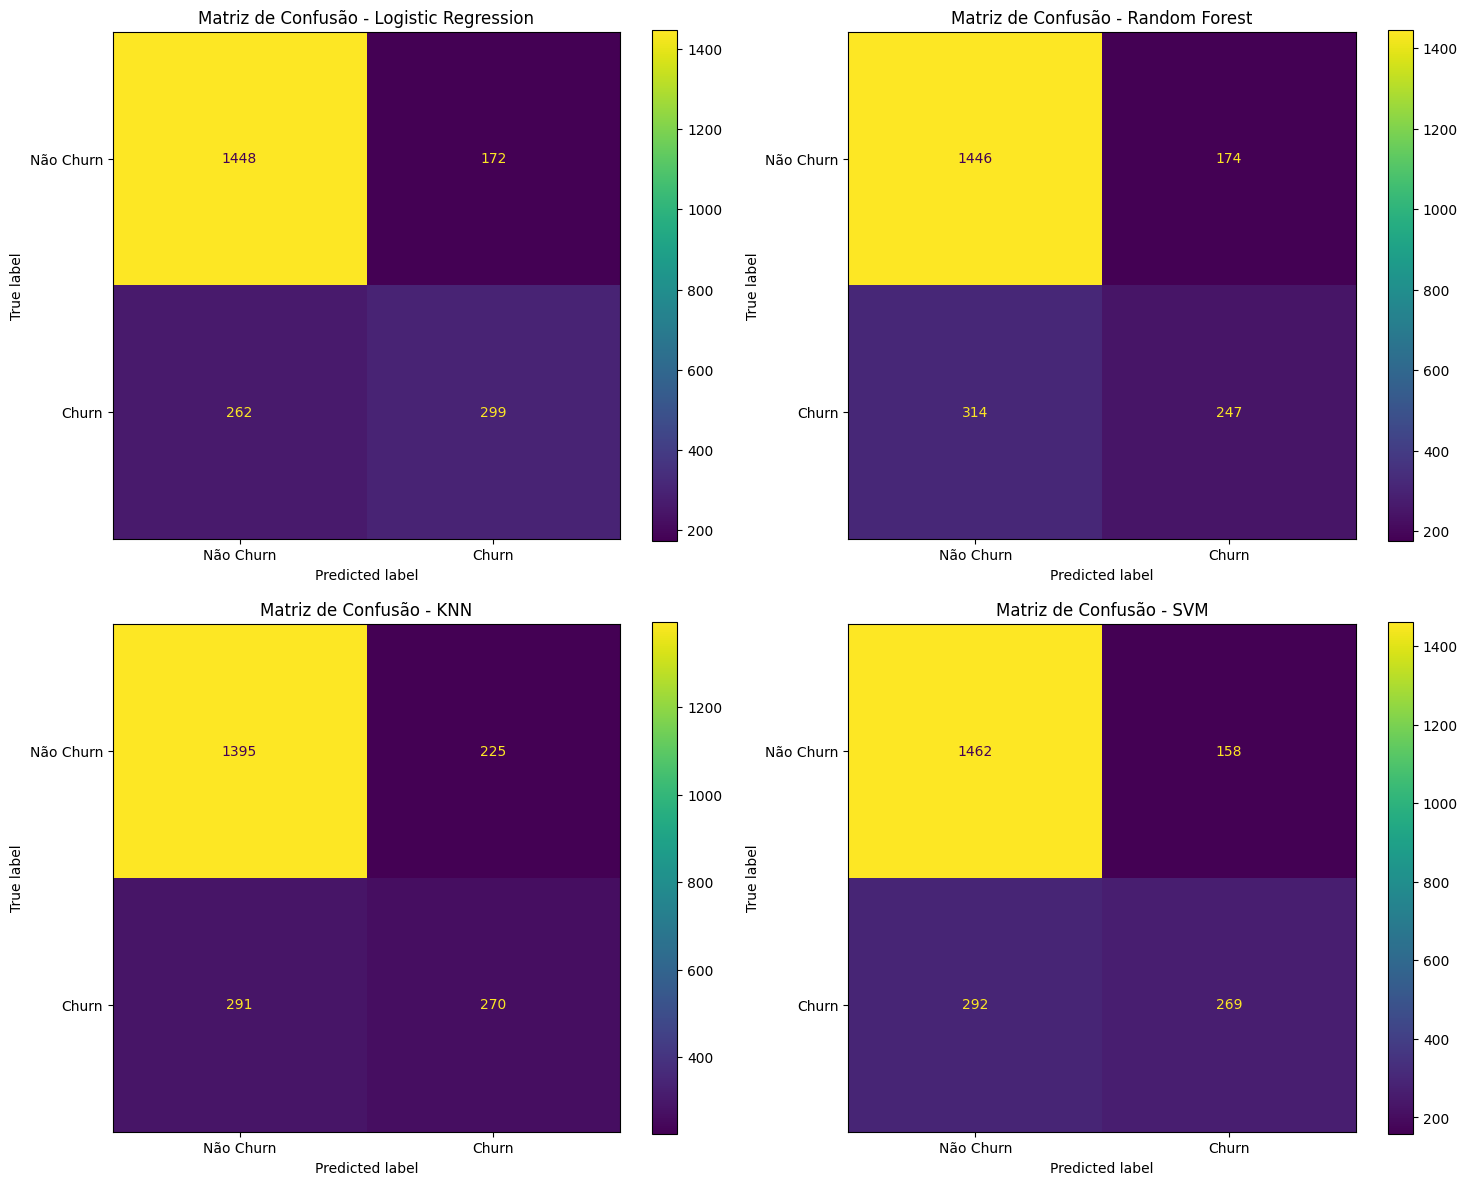

In [253]:
# Matrizes de Confusão
print(f"\n📊 4.2 Matrizes de Confusão:")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

model_predictions = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('KNN', y_pred_knn),
    ('SVM', y_pred_svm)
]

for i, (name, y_pred) in enumerate(model_predictions):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn'])
    disp.plot(ax=axes[i])
    axes[i].set_title(f'Matriz de Confusão - {name}')

plt.tight_layout()
plt.show()


#📋  Interpretação e Conclusões

In [244]:
# 5.1 Análise de Importância das Variáveis
print(f"\n🔍 5.1 Análise de importância das variáveis:")

# REGRESSÃO LOGÍSTICA - Coeficientes
print(f"\n🔵 REGRESSÃO LOGÍSTICA - Coeficientes:")
lr_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print(f"Top 8 variáveis mais importantes (por magnitude do coeficiente):")
for idx, row in lr_coef.head(8).iterrows():
    direction = "↑ Aumenta" if row['Coefficient'] > 0 else "↓ Diminui"
    print(f"• {row['Feature']}: {row['Coefficient']:.4f} ({direction} chance de churn)")

# RANDOM FOREST - Importância das Features
print(f"\n🌳 RANDOM FOREST - Importância das Features:")
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"Top 8 variáveis mais importantes:")
for idx, row in rf_importance.head(8).iterrows():
    print(f"• {row['Feature']}: {row['Importance']:.4f}")

# KNN - Análise conceitual
print(f"\n🎯 KNN - Interpretação:")
print(f"• Modelo baseado em proximidade (k=5 vizinhos mais próximos)")
print(f"• Variáveis mais impactantes são aquelas que mais contribuem para a distância")
print(f"• Performance: Acurácia = {results_df[results_df['Model']=='KNN']['Accuracy'].iloc[0]:.4f}")

# SVM - Análise conceitual
print(f"\n⚫ SVM - Interpretação:")
print(f"• Modelo encontra fronteira ótima entre classes")
print(f"• Variáveis relevantes definem os vetores de suporte")
print(f"• Performance: Acurácia = {results_df[results_df['Model']=='SVM']['Accuracy'].iloc[0]:.4f}")



🔍 5.1 Análise de importância das variáveis:

🔵 REGRESSÃO LOGÍSTICA - Coeficientes:
Top 8 variáveis mais importantes (por magnitude do coeficiente):
• meses_como_cliente: -1.3871 (↓ Diminui chance de churn)
• servico_internet_Fiber optic: 0.8110 (↑ Aumenta chance de churn)
• custo_total: 0.6679 (↑ Aumenta chance de churn)
• contas_diarias: -0.5561 (↓ Diminui chance de churn)
• custo_mensal: -0.5561 (↓ Diminui chance de churn)
• tipo_contrato_Two year: -0.5380 (↓ Diminui chance de churn)
• servico_internet_No: -0.3446 (↓ Diminui chance de churn)
• seguranca_online_No internet service: -0.3446 (↓ Diminui chance de churn)

🌳 RANDOM FOREST - Importância das Features:
Top 8 variáveis mais importantes:
• custo_total: 0.1590
• meses_como_cliente: 0.1556
• contas_diarias: 0.1421
• custo_mensal: 0.1357
• servico_internet_Fiber optic: 0.0447
• metodo_pagamento_Electronic check: 0.0403
• genero: 0.0267
• tipo_contrato_Two year: 0.0251

🎯 KNN - Interpretação:
• Modelo baseado em proximidade (k=5 v

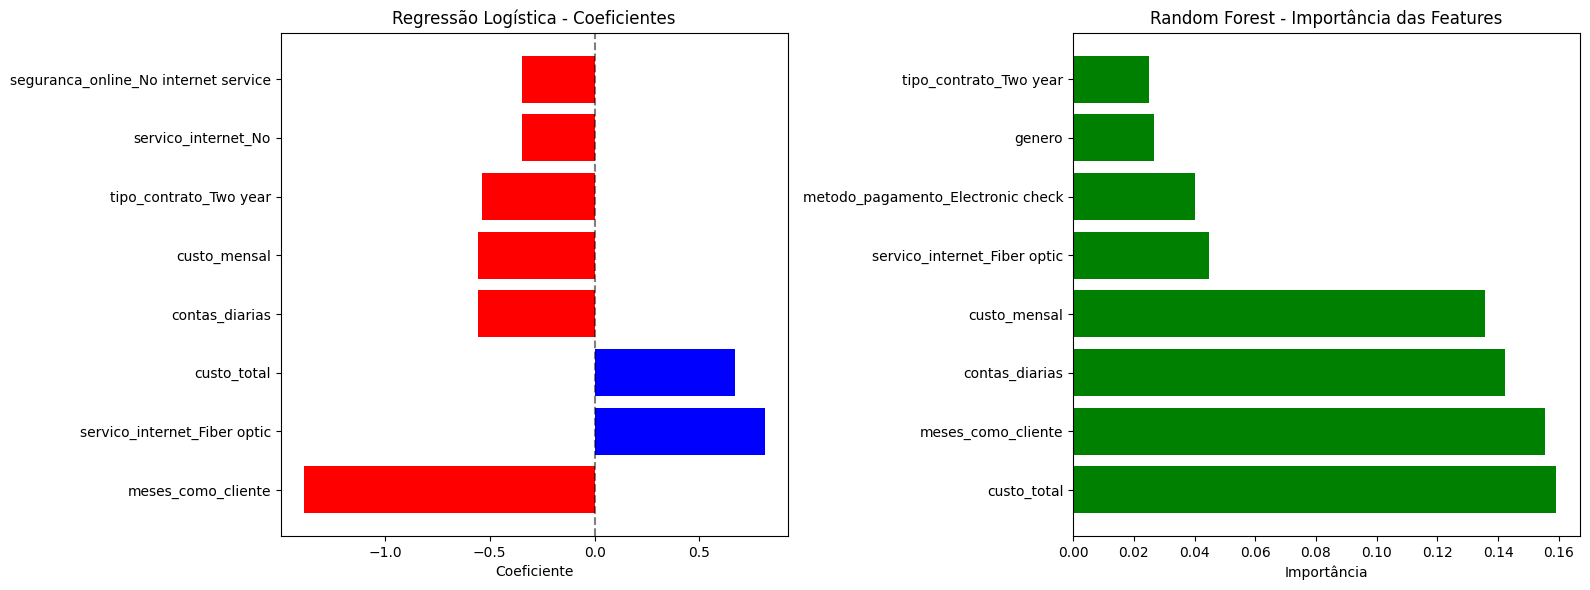

In [245]:
# Visualização das importâncias
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Coeficientes da Regressão Logística
top_lr = lr_coef.head(8)
colors_lr = ['red' if x < 0 else 'blue' for x in top_lr['Coefficient']]
axes[0].barh(range(len(top_lr)), top_lr['Coefficient'], color=colors_lr)
axes[0].set_yticks(range(len(top_lr)))
axes[0].set_yticklabels(top_lr['Feature'], fontsize=10)
axes[0].set_xlabel('Coeficiente')
axes[0].set_title('Regressão Logística - Coeficientes')
axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Importâncias do Random Forest
top_rf = rf_importance.head(8)
axes[1].barh(range(len(top_rf)), top_rf['Importance'], color='green')
axes[1].set_yticks(range(len(top_rf)))
axes[1].set_yticklabels(top_rf['Feature'], fontsize=10)
axes[1].set_xlabel('Importância')
axes[1].set_title('Random Forest - Importância das Features')

plt.tight_layout()
plt.show()

In [250]:
print(f"\n📋 RELATÓRIO FINAL ESTRATÉGICO")
print("=" * 60)

print(f"\n🎯 OBJETIVO ALCANÇADO:")
print(f"• Desenvolvidos 4 modelos preditivos para churn")
print(f"• Melhor modelo: {best_model_name} (F1-Score: {best_f1:.4f})")
print(f"• Pipeline robusto de ML implementado")

print(f"\n📊 PRINCIPAIS DESCOBERTAS:")

# Top 3 fatores de churn baseados no melhor modelo
if best_model_name == 'Random_Forest':
    top_factors = rf_importance.head(3)
    print(f"🏆 Top 3 fatores que mais influenciam churn (Random Forest):")
    for idx, row in top_factors.iterrows():
        print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")
else:
    top_factors = lr_coef.head(3)
    print(f"🏆 Top 3 fatores que mais influenciam churn (Regressão Logística):")
    for idx, row in top_factors.iterrows():
        direction = "↑" if row['Coefficient'] > 0 else "↓"
        print(f"   {idx+1}. {row['Feature']}: {row['Coefficient']:.4f} {direction}")

print(f"\n💡 INSIGHTS ESTRATÉGICOS:")
print(f"• Taxa de churn atual: {proporcao_evasao:.2%}")
print(f"• Modelo pode identificar {best_f1*100:.1f}% dos casos de churn")
print(f"• Foco nas variáveis de maior importância pode maximizar retenção")


📋 RELATÓRIO FINAL ESTRATÉGICO

🎯 OBJETIVO ALCANÇADO:
• Desenvolvidos 4 modelos preditivos para churn
• Melhor modelo: Logistic_Regression (F1-Score: 0.5795)
• Pipeline robusto de ML implementado

📊 PRINCIPAIS DESCOBERTAS:
🏆 Top 3 fatores que mais influenciam churn (Regressão Logística):
   5. meses_como_cliente: -1.3871 ↓
   17. servico_internet_Fiber optic: 0.8110 ↑
   15. custo_total: 0.6679 ↑

💡 INSIGHTS ESTRATÉGICOS:
• Taxa de churn atual: 25.72%
• Modelo pode identificar 58.0% dos casos de churn
• Foco nas variáveis de maior importância pode maximizar retenção
